In [26]:
#imports

import os
import email
import numpy as np
import pandas as pd
import seaborn as sns
import multiprocessing
import matplotlib.pyplot as plt
#from nltk.tokenize.regexp import RegexpTokenizer

In [3]:
#read in dataset
df = pd.read_csv('C:/Users/benso/Desktop/Projects/UsableAI/Project/emails.csv')
print(df.shape)
df.head()
print(df.head())

(517401, 2)
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...


In [71]:
#The dataset is too big to be running this initial analysis locally. I'm going to do some sampling for this initial analysis, and then when it comes time to run the ML pipelines, I'll run things on the cluster.

import random
import pandas as pd 
filename = 'C:/Users/benso/Desktop/Projects/UsableAI/Project/emails.csv'
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 20000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pd.read_csv(filename, skiprows=skip)
print(df.head())

                          file  \
0      allen-p/_sent_mail/209.   
1   allen-p/all_documents/158.   
2   allen-p/deleted_items/141.   
3  arnold-j/all_documents/810.   
4       bass-e/_sent_mail/920.   

                                             message  
0  Message-ID: <29850337.1075855689832.JavaMail.e...  
1  Message-ID: <15943342.1075855668962.JavaMail.e...  
2  Message-ID: <441422.1075858633856.JavaMail.eva...  
3  Message-ID: <13542936.1075857608613.JavaMail.e...  
4  Message-ID: <9703674.1075854728683.JavaMail.ev...  


In [72]:
message = df.loc[1]['message']
e = email.message_from_string(message)

e.items()

[('Message-ID', '<15943342.1075855668962.JavaMail.evans@thyme>'),
 ('Date', 'Wed, 30 Aug 2000 08:14:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'muller@thedoghousemail.com'),
 ('Subject', 'Re: (No Subject)'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'muller@thedoghousemail.com'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', '\\Phillip_Allen_Dec2000\\Notes Folders\\All documents'),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen.nsf')]

In [73]:
e.get('Date')

'Wed, 30 Aug 2000 08:14:00 -0700 (PDT)'

In [74]:
e.get_payload()

'Greg,\n\n Got your message.  Good luck on the bike ride.\n\n What were you doing to your apartment?  Are you setting up a studio?\n\n The kids are back in school.  Otherwise just work is going on here.\n\nKeith'

In [75]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [120]:
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head()

,file,message,date,subject,X-Folder,X-From,X-To,employee,To,body
0,allen-p/_sent_mail/209.,Message-ID: <29850337.1075855689832.JavaMail.e...,"Mon, 24 Jul 2000 03:15:00 -0700 (PDT)",Re: your address,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,"""Hargrove, Mac D"" <mac.d.hargrove@rssmb.com> @...",allen-p,mac.d.hargrove@rssmb.com,the merlin ct. address is still good. I don't...
1,allen-p/all_documents/158.,Message-ID: <15943342.1075855668962.JavaMail.e...,"Wed, 30 Aug 2000 08:14:00 -0700 (PDT)",Re: (No Subject),\Phillip_Allen_Dec2000\Notes Folders\All docum...,Phillip K Allen,muller@thedoghousemail.com,allen-p,muller@thedoghousemail.com,"Greg,\n\n Got your message. Good luck on the ..."
2,allen-p/deleted_items/141.,Message-ID: <441422.1075858633856.JavaMail.eva...,"Mon, 22 Oct 2001 16:46:23 -0700 (PDT)",Work Hours,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","Grigsby, Mike </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...",allen-p,"k..allen@enron.com, l..gay@enron.com, mog.heu@...","Dear West,\n\nWe talked briefly on Monday abou..."
3,arnold-j/all_documents/810.,Message-ID: <13542936.1075857608613.JavaMail.e...,"Wed, 21 Mar 2001 08:17:00 -0800 (PST)",Re: Cancellation of EOL Deal #1025253,\John_Arnold_Jun2001\Notes Folders\All documents,John Arnold,herve.duteil@americas.bnpparibas.com @ ENRON,arnold-j,herve.duteil@americas.bnpparibas.com,confirm\n\n\n\n\nherve.duteil@americas.bnppari...
4,bass-e/_sent_mail/920.,Message-ID: <9703674.1075854728683.JavaMail.ev...,"Fri, 10 Mar 2000 08:51:00 -0800 (PST)",Re: Vandy,\Eric_Bass_Dec2000\Notes Folders\'sent mail,Eric Bass,Timothy Blanchard,bass-e,timothy.blanchard@enron.com,BRUTAL!\n\n\n \n\tEnron North America Corp.\...


In [121]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,employee,To,body
0,allen-p/_sent_mail/209.,Message-ID: <29850337.1075855689832.JavaMail.e...,"Mon, 24 Jul 2000 03:15:00 -0700 (PDT)",Re: your address,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,"""Hargrove, Mac D"" <mac.d.hargrove@rssmb.com> @...",allen-p,mac.d.hargrove@rssmb.com,the merlin ct. address is still good. I don't...
1,allen-p/all_documents/158.,Message-ID: <15943342.1075855668962.JavaMail.e...,"Wed, 30 Aug 2000 08:14:00 -0700 (PDT)",Re: (No Subject),\Phillip_Allen_Dec2000\Notes Folders\All docum...,Phillip K Allen,muller@thedoghousemail.com,allen-p,muller@thedoghousemail.com,"Greg,\n\n Got your message. Good luck on the ..."
2,allen-p/deleted_items/141.,Message-ID: <441422.1075858633856.JavaMail.eva...,"Mon, 22 Oct 2001 16:46:23 -0700 (PDT)",Work Hours,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","Grigsby, Mike </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...",allen-p,"k..allen@enron.com, l..gay@enron.com, mog.heu@...","Dear West,\n\nWe talked briefly on Monday abou..."


In [122]:
df['file'][:10]

0               allen-p/_sent_mail/209.
1            allen-p/all_documents/158.
2            allen-p/deleted_items/141.
3           arnold-j/all_documents/810.
4                bass-e/_sent_mail/920.
5              bass-e/all_documents/59.
6       bass-e/discussion_threads/1761.
7                      bass-e/sent/347.
8    baughman-d/discussion_threads/335.
9    baughman-d/discussion_threads/371.
Name: file, dtype: object

In [123]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,employee,To,body
0,allen-p/_sent_mail/209.,Message-ID: <29850337.1075855689832.JavaMail.e...,"Mon, 24 Jul 2000 03:15:00 -0700 (PDT)",Re: your address,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,"""Hargrove, Mac D"" <mac.d.hargrove@rssmb.com> @...",allen-p,mac.d.hargrove@rssmb.com,the merlin ct. address is still good. I don't...
1,allen-p/all_documents/158.,Message-ID: <15943342.1075855668962.JavaMail.e...,"Wed, 30 Aug 2000 08:14:00 -0700 (PDT)",Re: (No Subject),\Phillip_Allen_Dec2000\Notes Folders\All docum...,Phillip K Allen,muller@thedoghousemail.com,allen-p,muller@thedoghousemail.com,"Greg,\n\n Got your message. Good luck on the ..."
2,allen-p/deleted_items/141.,Message-ID: <441422.1075858633856.JavaMail.eva...,"Mon, 22 Oct 2001 16:46:23 -0700 (PDT)",Work Hours,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","Grigsby, Mike </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...",allen-p,"k..allen@enron.com, l..gay@enron.com, mog.heu@...","Dear West,\n\nWe talked briefly on Monday abou..."


In [124]:
top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

,Employee_name,Counts
0,kaminski-v,18
1,dasovich-j,18
2,kean-s,15
3,mann-k,13
4,shackleton-s,11
5,jones-t,11
6,lenhart-m,8
7,scott-s,7
8,germany-c,7
9,farmer-d,7


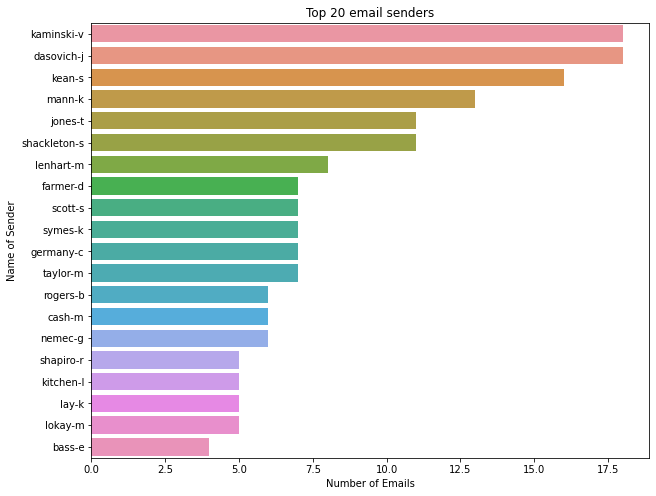

In [105]:
#Let's look at the top 20 email senders.

plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20)
plt.title("Top 20 email senders")
plt.xlabel("Number of Emails")
plt.ylabel("Name of Sender")
plt.savefig('C:/Users/benso/Desktop/Projects/UsableAI/Project/Figures/top20senders.png')
plt.show()

In [106]:
#Let's parse out what the subject of these emails are, or the folders that they're in.

print("number of folders: ", df.shape[0])
print("number of unique folders: ", df['X-Folder'].unique().shape[0])

number of folders:  284
number of unique folders:  218


In [107]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

,folder_name,count
0,\Tanya_Jones_Dec2000\Notes Folders\All documents,6
1,\Jeff_Dasovich_June2001\Notes Folders\All docu...,5
2,\Kay_Mann_June2001_4\Notes Folders\'sent mail,5
3,\Steven_Kean_June2001_4\Notes Folders\Discussi...,4
4,\kate symes 6-27-02\Notes Folders\All documents,4
5,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,4
6,\Susan_Scott_Dec2000_June2001_2\Notes Folders\...,4
7,\Kay_Mann_June2001_1\Notes Folders\All documents,4
8,\Matthew_Lenhart_Jun2001\Notes Folders\All doc...,3
9,\Jeff_Dasovich_June2001\Notes Folders\Sent,3


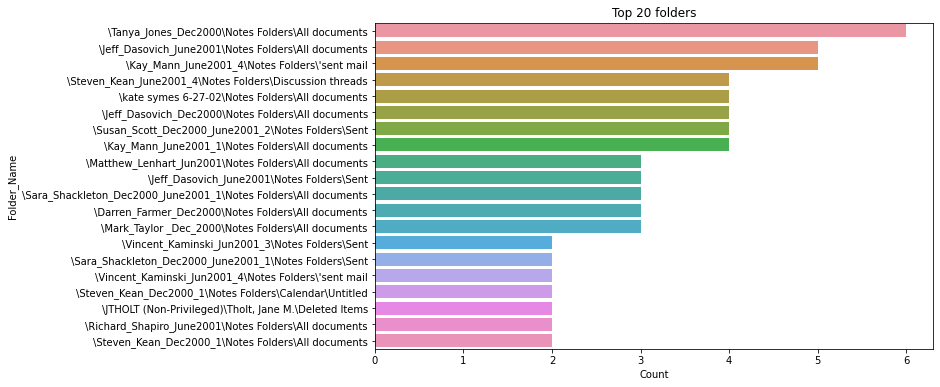

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :])
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

In [108]:
#Let's make the column names more readable


print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

\Phillip_Allen_Dec2000\Notes Folders\'sent mail


"'sent mail"

In [109]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

,file,message,date,subject,X-Folder,X-From,X-To,employee,To,body
0,allen-p/_sent_mail/209.,Message-ID: <29850337.1075855689832.JavaMail.e...,"Mon, 24 Jul 2000 03:15:00 -0700 (PDT)",Re: your address,'sent mail,Phillip K Allen,"""Hargrove, Mac D"" <mac.d.hargrove@rssmb.com> @...",allen-p,mac.d.hargrove@rssmb.com,the merlin ct. address is still good. I don't...
1,allen-p/all_documents/158.,Message-ID: <15943342.1075855668962.JavaMail.e...,"Wed, 30 Aug 2000 08:14:00 -0700 (PDT)",Re: (No Subject),all documents,Phillip K Allen,muller@thedoghousemail.com,allen-p,muller@thedoghousemail.com,"Greg,\n\n Got your message. Good luck on the ..."


In [111]:
# count unique folders
print("Unique Folders: ", len(df['X-Folder'].unique()))

# view some of them
df['X-Folder'].unique()[0:20]

Unique Folders:  37


array(["'sent mail", 'all documents', 'deleted items',
       'discussion threads', 'sent', 'sent items', 'gomez remediation',
       'pg&e pcbs', 'dlr', 'resumes for recruiting', 'archives', 'inbox',
       'notes inbox', 'el paso', 'transport', 'hold', 'market intel',
       'truequote', 'projects', 'universities'], dtype=object)

In [112]:
def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

In [113]:
df['subject'] = replace_empty_with_nan(df['subject'])
df['To'] = replace_empty_with_nan(df['To'])

In [114]:
# calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

To    0.028169
dtype: float64

In [115]:
df.dropna(axis=0, inplace=True)

In [116]:
df.isnull().sum(), df.shape

(file        0
 message     0
 date        0
 subject     0
 X-Folder    0
 X-From      0
 X-To        0
 employee    0
 To          0
 body        0
 dtype: int64,
 (276, 10))

In [133]:
df.head(3)


,subject,X-Folder,X-From,X-To,employee,To,body
0,Re: your address,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,"""Hargrove, Mac D"" <mac.d.hargrove@rssmb.com> @...",allen-p,mac.d.hargrove@rssmb.com,the merlin ct. address is still good. I don't...
1,Re: (No Subject),\Phillip_Allen_Dec2000\Notes Folders\All docum...,Phillip K Allen,muller@thedoghousemail.com,allen-p,muller@thedoghousemail.com,"Greg,\n\n Got your message. Good luck on the ..."
2,Work Hours,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","Grigsby, Mike </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...",allen-p,"k..allen@enron.com, l..gay@enron.com, mog.heu@...","Dear West,\n\nWe talked briefly on Monday abou..."


In [135]:
cols_to_drop = ['To']
df.drop(cols_to_drop, axis=1, inplace=True)


In [136]:
df.head()

,subject,X-Folder,X-From,X-To,employee,body
0,Re: your address,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,"""Hargrove, Mac D"" <mac.d.hargrove@rssmb.com> @...",allen-p,the merlin ct. address is still good. I don't...
1,Re: (No Subject),\Phillip_Allen_Dec2000\Notes Folders\All docum...,Phillip K Allen,muller@thedoghousemail.com,allen-p,"Greg,\n\n Got your message. Good luck on the ..."
2,Work Hours,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","Grigsby, Mike </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...",allen-p,"Dear West,\n\nWe talked briefly on Monday abou..."
3,Re: Cancellation of EOL Deal #1025253,\John_Arnold_Jun2001\Notes Folders\All documents,John Arnold,herve.duteil@americas.bnpparibas.com @ ENRON,arnold-j,confirm\n\n\n\n\nherve.duteil@americas.bnppari...
4,Re: Vandy,\Eric_Bass_Dec2000\Notes Folders\'sent mail,Eric Bass,Timothy Blanchard,bass-e,BRUTAL!\n\n\n \n\tEnron North America Corp.\...


In [118]:
sendees = pd.DataFrame(df['To'].value_counts())
sendees.reset_index(inplace=True)


sendees.columns = ['Sendees', 'count']
# top 20 folders
sendees.iloc[:20,:]

,Sendees,count
0,jeff.dasovich@enron.com,4
1,kate.symes@enron.com,4
2,pete.davis@enron.com,4
3,benjamin.rogers@enron.com,3
4,klay@enron.com,3
5,michelle.cash@enron.com,3
6,leslie.hansen@enron.com,3
7,tana.jones@enron.com,3
8,kay.mann@enron.com,3
9,brent.hendry@enron.com,3


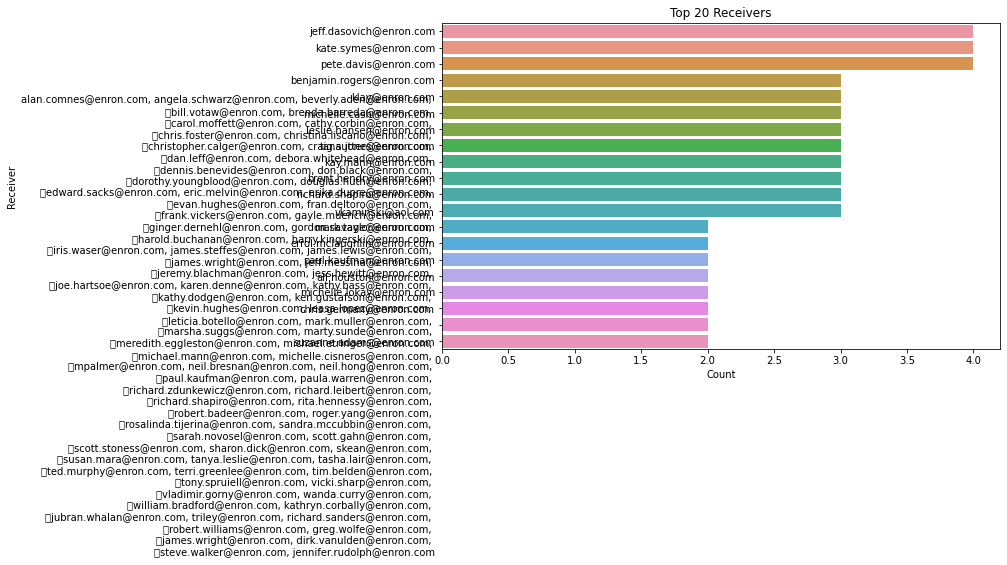

In [119]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='Sendees', data=sendees.iloc[:20, :])
plt.title("Top 20 Receivers")
plt.xlabel("Count")
plt.ylabel("Receiver")
plt.show()